## 💫 [Day 25](https://adventofcode.com/2018/day/25)


In [0]:
import numpy as np

def get_num_constellations(inputs):
  """Compute number of constellations"""
  # Build adjacency matrix
  num_stars = inputs.shape[0]
  adjacency = np.sum(np.abs(inputs[:, None, :] - inputs[None, :, :]), axis=-1) <= 3
  visited = np.zeros((num_stars,))
  constellation = 1
  
  # Assign constellation ID to a star and its chained neighbors
  def assign(i, c):
    if visited[i] == 0:
      visited[i] = c
      for neighbor in np.where(adjacency[i])[0]:
        assign(neighbor, c)
        
  # Assign all constellations
  while np.sum(visited > 0) < num_stars:
    # Get first non-assigned star
    start_index = np.argmin(visited)
    assign(start_index, constellation)
    constellation += 1
    
  # Return
  return len(set(visited)), visited, adjacency

In [2]:
with open('day25.txt', 'r') as f:
  inputs = np.array([list(map(int, line.split(','))) for line in f.read().splitlines()])
  
print("Number of constellations:", get_num_constellations(inputs)[0])

Number of constellations: 407


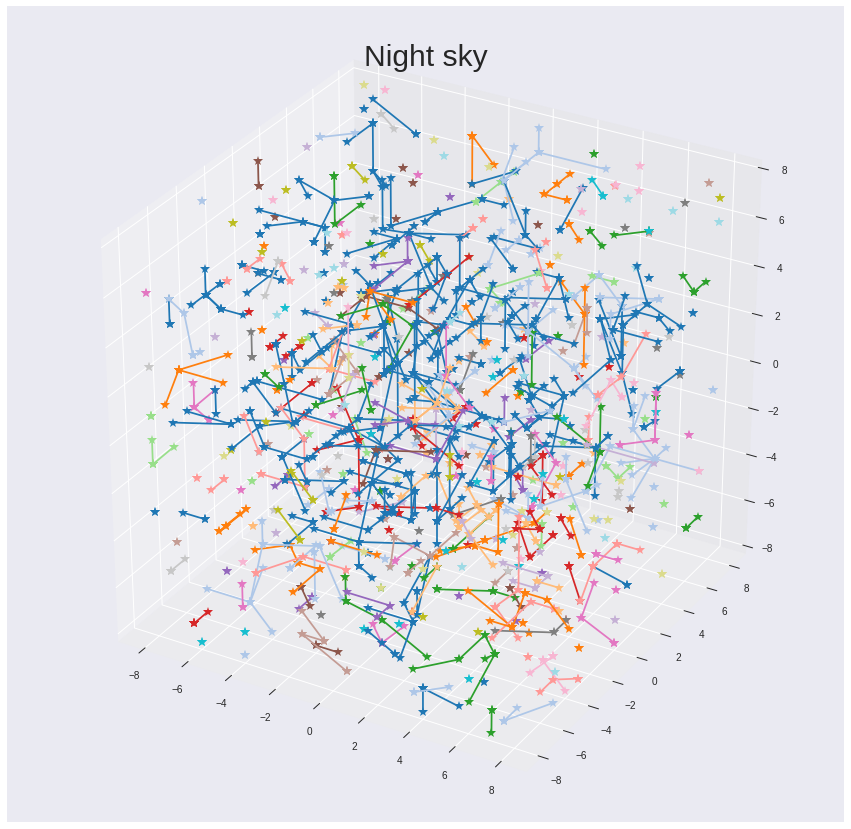

In [4]:
from matplotlib import pyplot as plt
from matplotlib import colors
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D

def visualize(inputs):
  num_constellations, constellations, adjacency = get_num_constellations(inputs)
  # colormap
  c = cm.ScalarMappable(norm=colors.Normalize(vmin=0, vmax=num_constellations),
                         cmap=plt.get_cmap('tab20'))
  fig = plt.figure(figsize=(15, 15))
  # Plot constellations
  ax = fig.add_subplot(111, projection='3d')
  for i, line in enumerate(adjacency):
    for j in np.argwhere(line)[0]:
      plt.plot([inputs[i, 0], inputs[j, 0]], [inputs[i, 1], inputs[j, 1]], 
               zs=[inputs[i, 2], inputs[j, 2]], marker='*', markersize=10,
               color=c.to_rgba(constellations[i]))
  plt.title('Night sky', fontsize=30)
  plt.show()
  
  
visualize(inputs)